In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
import time

In [9]:
# Read MNIST Dataset
input  = pd.read_csv('MNIST_Train.csv')
labels = input['label']
features = input.drop('label',axis = 1)

In [10]:
# Standardize Data
standardized_data = StandardScaler().fit_transform(features)
print(standardized_data.shape)

(42000, 784)


In [11]:
'''  Function to return TSNE model
     Arguments - 
     1. Data - Data on which TSNE will run
     2. Components - Dimensionality expected as output
     3. Perplexity = No of Datapoints whose distances should be preserved
     4. Iterations - No of times to iterate to reach optimal output
 
 '''
def tsne(data,components,perplexity,iterations):
    tic = time.time()
    model = TSNE(n_components= components,random_state=0,perplexity= perplexity,n_iter= iterations)
    tsne_data = model.fit_transform(data)
    toc = time.time()
    print("TSNE Function executed in: ",toc - tic,' seconds')
    return tsne_data

In [12]:
'''  Function to plot TSNE Model
     Arguments - 
     1. Data - Data on which TSNE will run
     2. Labels - Class Labels
     3. Perplexity = No of Datapoints whose distances should be preserved
     4. Iterations - No of times to iterate to reach optimal output
 
 '''

def plotTSNE(data,labels,perplexity,iterations):
    tsne_df = pd.DataFrame(tsne_data,columns = ('Dim1','Dim2','Label'))
    #plt.title('With perplexity = ',perplexity)
    sn.FacetGrid(tsne_df,hue = ('Label'),height = 6).map(plt.scatter,'Dim1','Dim2').add_legend()
    plt.plot()

TSNE Function executed in:  582.7395894527435  seconds
TSNE Function executed in:  631.6257591247559  seconds
TSNE Function executed in:  741.8485133647919  seconds
TSNE Function executed in:  814.6638622283936  seconds
TSNE Function executed in:  1038.2460398674011  seconds
TSNE Function executed in:  1084.3174953460693  seconds


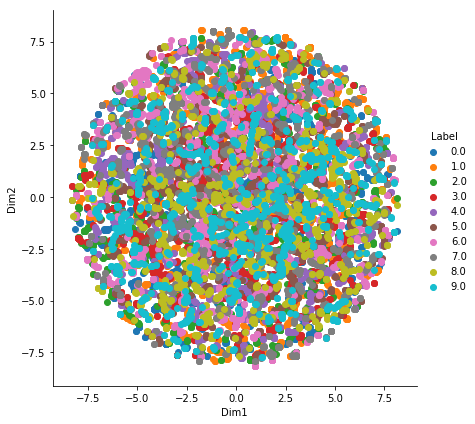

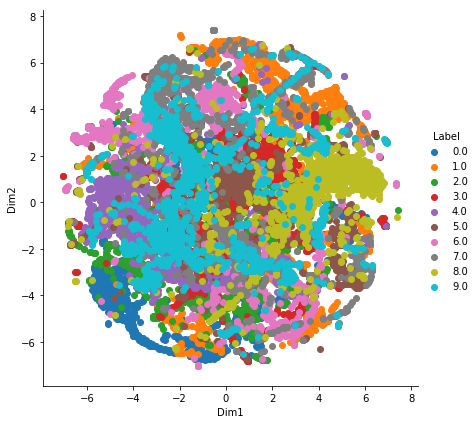

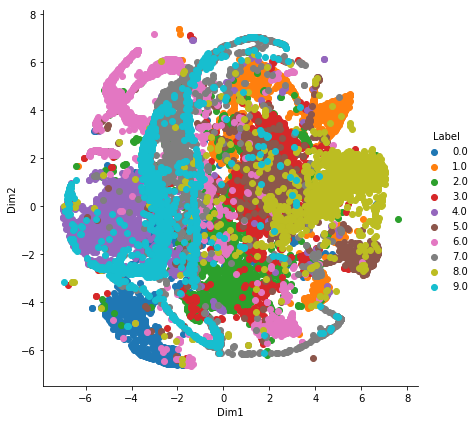

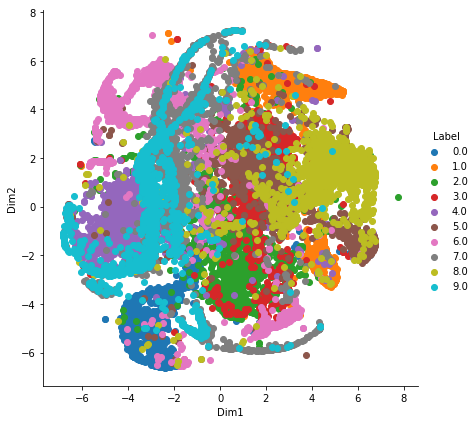

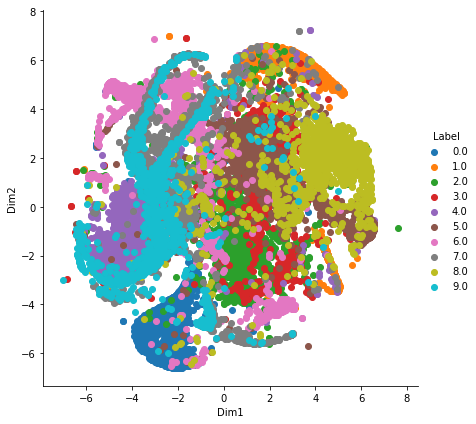

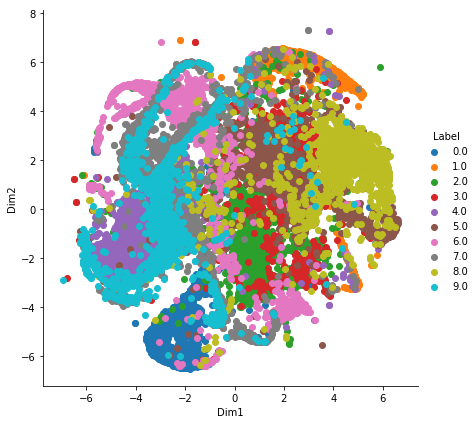

In [13]:
test_data= standardized_data[0:15000,]
test_label = labels[0:15000,]



perplexity = [2,10,30,50,80,100]


for i in perplexity:
    send_perplexity = i
    tsne_data = tsne(test_data,components=2,perplexity= i,iterations=5000)
    tsne_data = np.vstack((tsne_data.T, test_label)).T
    plotTSNE(data = tsne_data,labels = test_label,perplexity= send_perplexity,iterations=5000)